In [1]:
!cp /kaggle/input/reference-img/d0679d9ee20fbfa264100d2f952f0698.jpg /kaggle/working/
!cp /kaggle/input/iaadfw/img_gen.jpeg /kaggle/working/
!cp /kaggle/input/nice-me/white-t-shirt-men-s-basic-wear-full-body.jpg /kaggle/working/
!cp /kaggle/input/woman1/young-beautiful-woman-pink-warm-sweater-natural-look-smiling-portrait-isolated-long-hair_285396-896.avif /kaggle/working/
!cp /kaggle/input/niggaa/360_F_402624137_Yc0kTeIm7mJn9YA67pwIOsiDeAb5D2tb.jpg /kaggle/working/
!cp /kaggle/input/testing-set/sreeleela_img.jpeg /kaggle/working
!cp /kaggle/input/res-imgg/e3dce3e7302fe4a2b6dabca424b038d2.jpg /kaggle/working/
!cp /kaggle/input/virat-kholi-data-set/bike_img_vk.jpeg /kaggle/working/
!cp /kaggle/input/virat-kholi-data-set/virat_kholi.avif /kaggle/working/
!cp /kaggle/input/playing-vk/plying.jpeg /kaggle/working
!cp /kaggle/input/playrwdf/playingdw.jpeg /kaggle/working
!cp /kaggle/input/kl-rahul-new-dataset/kl_rahul.jpg /kaggle/working
!cp /kaggle/input/kl-rahul-new-dataset/vinaka_photo.jpg /kaggle/working

### Installing Libraries

In [2]:
!pip install -q -U google-genai
!pip install insightface opencv-python-headless onnxruntime-gpu

import torch, torchvision
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
#torch: 2.6.0+cu124
#torchvision: 0.21.0+cu124
!pip uninstall basicsr gfpgan realesrgan -y

!pip install basicsr==1.4.2
!pip install gfpgan==1.3.8
!pip install realesrgan==0.3.0

!pip install gfpgan
!pip install realesrgan
!pip install basicsr

# Step 1: Uninstall incompatible versions
!pip uninstall -y torch torchvision torchaudio

# Step 2: Install the correct CUDA 12.4-compatible versions
!pip install torch==2.6.0 torchvision==0.21.0 --index-url https://download.pytorch.org/whl/cu124 --no-cache-dir

!pip install torchvision==0.15.2 

from gfpgan import GFPGANer
from realesrgan import RealESRGANer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 6.3 MB/s eta 0:00:00ta 0:00:01


### Input

In [3]:
Source_img = "" # Enter Img Path
Product_img = "" # Enter Img Path
Prompt = str(input("Enter Your Prompt Here \n"))
#have a face OPTIONAL 
Face_img = "" # Enter Img Path


KeyboardInterrupt: Interrupted by user

Gemini API Key

In [ ]:
API_KEY=""

### Editing Image Using Gemini 

✅ Image saved as gen_img.png


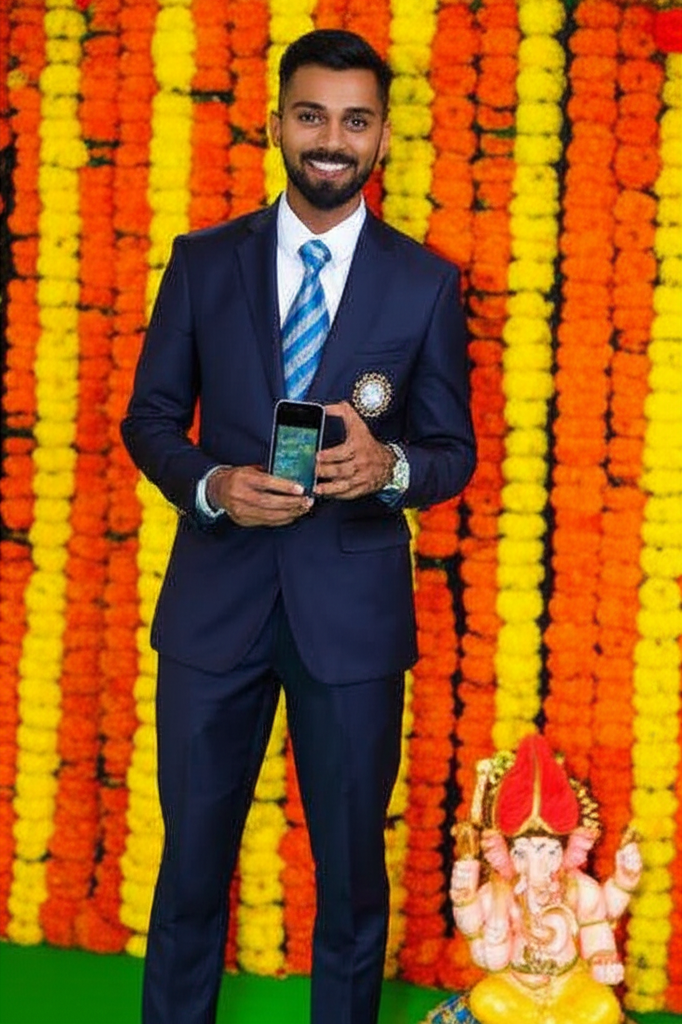

In [6]:
import base64
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO


client = genai.Client(api_key=API_KEY)

def encode_image(path):
    
    with open(path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")


image1_b64 = encode_image(Source_img)
image2_b64 = encode_image(Product_img)


prompt_text = Prompt


contents = [
    types.Content(
        parts=[
            types.Part(text=prompt_text),
            types.Part(
                inline_data=types.Blob(mime_type="image/jpeg", data=image1_b64)
            ),
            types.Part(
                inline_data=types.Blob(mime_type="image/jpeg", data=image2_b64)
            ),
        ]
    )
]


response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(
        response_modalities=["TEXT", "IMAGE"]  # Fixed: underscore instead of camelCase
    ),
)


found_image = False
for candidate in response.candidates:
    for part in candidate.content.parts:
        if part.text is not None:
            print(part.text)
        
        elif part.inline_data is not None:
           
            image = Image.open(BytesIO(part.inline_data.data))
            image.save("/kaggle/working/gen_img_using_gemini.png")
            print("Image saved as gen_img_using_gemini.png")
            found_image = True
            break
    
    if found_image:
        break


if found_image:
    from IPython.display import Image, display
    display(Image("/kaggle/working/gen_img_using_gemini.png"))
else:
    print("No image was generated in the response")

### Convert AVIF to JPEG

In [8]:
"""
!pip install pillow-avif-plugin

from PIL import Image
import pillow_avif 

def convert_avif_to_jpg(input_path, output_path, quality=85):
    try:
        img = Image.open(input_path)
        img.save(output_path, "jpeg", quality=quality)
        print(f"Successfully converted '{input_path}' to '{output_path}'")
    except FileNotFoundError:
        print(f"Error: Input file not found at '{input_path}'")
    except Exception as e:
        print(f"An error occurred during conversion: {e}")


input_avif_file = "/kaggle/working/virat_kholi.avif"
output_jpg_file = "/kaggle/working/virat_kholi.jpg"

convert_avif_to_jpg(input_avif_file, output_jpg_file)
"""

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.5 MB/s eta 0:00:0000:0100:01
✅ Successfully converted '/kaggle/working/virat_kholi.avif' to '/kaggle/working/virat_kholi.jpg'


### Checking GPU is Available

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

### Downloading Weights

In [8]:
!pip install gdown
!gdown --id 1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF -O inswapper_128.onnx


!mkdir -p /kaggle/working/weights

!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.4/GFPGANv1.4.pth -P /kaggle/working/weights/


!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P /kaggle/working/weights/


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF
From (redirected): https://drive.google.com/uc?id=1krOLgjW2tAPaqV-Bw4YALz0xT5zlb5HF&confirm=t&uuid=91bdedbd-33cb-4b89-a80f-d69423e1b510
To: /kaggle/working/inswapper_128.onnx
100%|█████████████████████████████████████████| 554M/554M [00:04<00:00, 116MB/s]


### Insight Face Swapping

In [9]:


import cv2
import insightface
import numpy as np
from insightface.app import FaceAnalysis

app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))




from insightface.model_zoo import get_model
swapper = get_model('/kaggle/working/inswapper_128.onnx', download=False, download_zip=False)


def insightface_swap(source_path, target_path, output_path):
   
    source_img = cv2.imread(source_path)
    target_img = cv2.imread(target_path)
    
    
    source_faces = app.get(source_img)
    target_faces = app.get(target_img)
    
    if len(source_faces) == 0:
        print("No face detected in source image!")
        return
    if len(target_faces) == 0:
        print("No face detected in target image!")
        return
    
    
    result = swapper.get(target_img, target_faces[0], source_faces[0], paste_back=True)
    
   
    cv2.imwrite(output_path, result)
    print(f"High-quality face swap completed! Saved to: {output_path}")

if Face_img:
    insightface_swap(Face_img,"/kaggle/working/gen_img_using_gemini.png", "/kaggle/working/result_swap.jpg")
else:
    insightface_swap(Source_img,"/kaggle/working/gen_img_using_gemini.png", "/kaggle/working/result_swap.jpg")


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:02<00:00, 111651.94KB/s]


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


High-quality face swap completed! Saved to: /kaggle/working/insightface_result.jpg


### Enhancing the swapped face with gfpgan and RealESRGAN

In [19]:
import cv2
import numpy as np
from gfpgan import GFPGANer
from realesrgan import RealESRGANer


img = cv2.imread("/kaggle/working/result_swap.jpg")



gfpganer = GFPGANer(
    model_path='weights/GFPGANv1.4.pth',  
    upscale=1,
    arch='clean',
    channel_multiplier=2,
    bg_upsampler=None         # we will use Real-ESRGAN after
)


_, _, restored = gfpganer.enhance(img, has_aligned=False, only_center_face=False, paste_back=True)
cv2.imwrite('swapped_gfpgan.jpg', restored)



from basicsr.archs.rrdbnet_arch import RRDBNet

model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)

upsampler = RealESRGANer(
    scale=4,
    model_path='weights/RealESRGAN_x4plus.pth',
    model=model,        # This is the crucial missing parameter!
    tile=0,           
    tile_pad=10,
    pre_pad=0,
    half=False        
)

output, _ = upsampler.enhance(restored, outscale=2)  # choose 2 or 4 as you like
cv2.imwrite('original_image.jpg', output)
print('swapped')
from IPython.display import Image, display
display(Image("/kaggle/working/original_image.jpg"))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /kaggle/working/gfpgan/weights/detection_Resnet50_Final.pth



100%|██████████| 104M/104M [00:00<00:00, 162MB/s]  


Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /kaggle/working/gfpgan/weights/parsing_parsenet.pth



100%|██████████| 81.4M/81.4M [00:00<00:00, 157MB/s] 


swapped
